# evaluomeR PCA

In [22]:
library("evaluomeR")
library("psych")
library("scales")
library("caret")

options(scipen=10)

In [51]:
?psych

In [2]:
# https://www.r-data-scientist.com/es/blog/statistical-tests/bartlett-test/
# https://www.r-data-scientist.com/es/blog/statistical-tests/kaiser-meyer-olkin-test/

# Table of contents
* [PCA](#pca)
* [Bartlett Sphericity Test](#bartlett)
    * [Bartlett Sphericity Test - Conclusiones](#bartlett-conclusion)
* [Kaiser-Meyer-Olkin Test](#kmo)
* [References](#references)

# PCA <a class="anchor" id="pca"></a>

In [24]:
# data("rnaMetrics")
seed = 13606
scaled = FALSE
k.range=c(2,6)
set.seed(seed)
input_df = read.csv(paste0(getwd(), "/","../../usecases/usecase2/data/agro.csv"), header=TRUE, stringsAsFactors=FALSE)
#input_df = read.csv(paste0(getwd(), "/","../../usecases/usecase2/data/obo-119.csv"), header=TRUE, stringsAsFactors=FALSE)
#input_df = as.data.frame(assay(rnaMetrics))
data = input_df[-1]

In [25]:
if (scaled) {
    data = scales::rescale(as.matrix(data), to=c(0,1))
}
head(data)

ANOnto,AROnto,CBOOnto,CBOOnto2,CROnto,DITOnto,INROnto,LCOMOnto,NACOnto,NOCOnto,NOMOnto,POnto,PROnto,RFCOnto,RROnto,TMOnto,TMOnto2,WMCOnto,WMCOnto2
0.0000000,3.9503849,0.9991446,0.9991446,0.9957228,3,0.9991446,1.999142,1.000000,292.000000,2.9632164,0.9957228,0.7478411,3.9623610,0.252158895,0.00000000,0.000000,1.999142,1.000000
0.9298246,0.5438596,0.9824561,0.9824561,0.0000000,5,0.9824561,2.357143,1.000000,3.733333,0.9824561,0.5789474,0.5000000,1.9649123,0.500000000,0.00000000,0.000000,2.357143,1.000000
0.7500000,0.0000000,0.8750000,0.8750000,3998.8750000,3,0.8750000,1.333333,1.000000,3.500000,2275.7500000,0.2500000,0.9996157,2276.6250000,0.000384341,0.00000000,0.000000,1.333333,1.000000
0.9907407,3.1018519,1.0694444,1.0694444,0.3634259,16,1.0694444,7.695971,1.052174,2.287129,1.2037037,1.0555556,0.5295316,2.2731481,0.470468432,0.06264501,2.148148,9.134783,1.186957
1.2362637,0.0000000,1.0659341,1.0659341,0.0000000,6,1.0329670,2.467532,1.077465,4.700000,0.5879121,0.8571429,0.3627119,1.6538462,0.637288136,0.07182320,2.000000,2.676056,1.084507
0.0000000,0.0000000,0.6666667,0.6666667,1107.6666670,2,0.6666667,1.000000,1.000000,2.000000,0.0000000,0.0000000,0.0000000,0.6666667,1.000000000,0.00000000,0.000000,1.000000,1.000000


In [26]:
data.pca = princomp(data, cor = TRUE)
# Calcular la proporción acumulada de la varianza explicada de los factores
parte.pca <- data.pca$sdev^2/sum(data.pca$sdev^2)*100

In [27]:
print(parte.pca)

      Comp.1       Comp.2       Comp.3       Comp.4       Comp.5       Comp.6 
3.770477e+01 1.617399e+01 1.023493e+01 8.436831e+00 7.270416e+00 5.503505e+00 
      Comp.7       Comp.8       Comp.9      Comp.10      Comp.11      Comp.12 
3.810833e+00 3.350284e+00 2.136361e+00 1.980596e+00 1.814285e+00 8.926306e-01 
     Comp.13      Comp.14      Comp.15      Comp.16      Comp.17      Comp.18 
3.532935e-01 2.829189e-01 4.808988e-02 6.268514e-03 4.825372e-15 1.199166e-15 
     Comp.19 
0.000000e+00 


In [28]:
print(cumsum(parte.pca))

   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
 37.70477  53.87876  64.11369  72.55052  79.82093  85.32444  89.13527  92.48556 
   Comp.9   Comp.10   Comp.11   Comp.12   Comp.13   Comp.14   Comp.15   Comp.16 
 94.62192  96.60251  98.41680  99.30943  99.66272  99.94564  99.99373 100.00000 
  Comp.17   Comp.18   Comp.19 
100.00000 100.00000 100.00000 


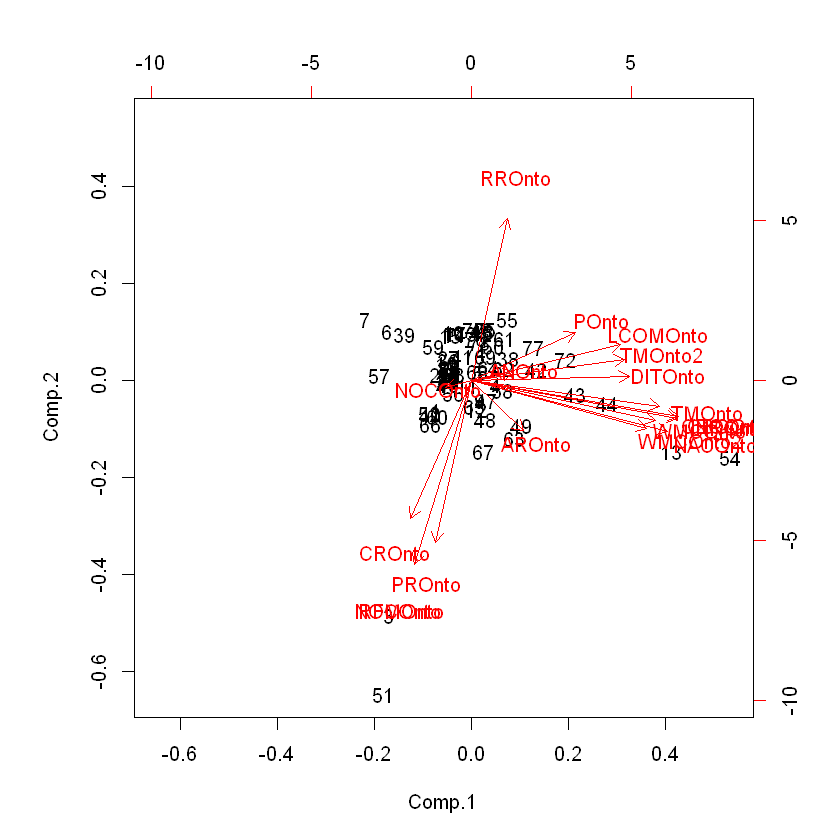

In [29]:
# Representación gráfica del PCA
biplot(data.pca)

# Bartlett Sphericity Test <a class="anchor" id="bartlett"></a>

In [46]:
R = cor(data)
#print(correlations)

In [48]:
cor_metrics = findCorrelation(R, cutoff = 0.9, verbose = FALSE, names=TRUE)
cor_metrics

[1] "CBOOnto"  "CBOOnto2" "WMCOnto"  "RFCOnto"  "PROnto"

In [33]:
R = R[, !colnames(R) %in% cor_metrics]
R = R[!rownames(R) %in% cor_metrics, ]
ncol(R)
nrow(R)

[1] 14

[1] 14

In [34]:
print(cortest.bartlett(R, n = nrow(data)))

$chisq
[1] 687.513

$p.value
[1] 2.407766e-92

$df
[1] 91



## Bartlett Sphericity Test  - Conclusion<a class="anchor" id="bartlett-conclusion"></a>

Se rechaza la hipótesis nula al nivel del 5% (valor p=0<0.05). Por lo tanto, se puede realizar de manera eficiente un PCA en el conjunto de datos.

**Nota**:
La prueba de Bartlett tiene un gran inconveniente. Tiende a ser siempre estadísticamente significativo cuando aumenta el número de instancias n.

Algunas referencias aconsejan utilizar esta prueba solo si la relación n:p (número de instancias dividido entre el número de variables) es inferior a 5.

In [35]:
# Relación n:p es 4.10:
nrow(data)/ncol(data)

[1] 4.105263

# Kaiser-Meyer-Olkin Test <a class="anchor" id="kmo"></a>


In [36]:
R = cor(data)

In [37]:
R = R[, !colnames(R) %in% cor_metrics]
R = R[!rownames(R) %in% cor_metrics, ]
ncol(R)
nrow(R)

[1] 14

[1] 14

In [38]:
kmo_value = psych::KMO(R)

In [39]:
kmo_value$MSA

[1] 0.6792825

La matriz de correlación parcial se puede obtener a partir de la matriz de correlación. Se calcula la inversa de esta última:

![equation](https://latex.codecogs.com/svg.image?R^{-1}=(v)_{ij})

Si el índice KMO es alto (≈1), el PCA puede actuar de manera eficiente.
Si el índice KMO es bajo (≈0), el PCA no es relevante.

In [ ]:
data.pca = princomp(data, cor = TRUE)
# Calcular la proporción acumulada de la varianza explicada de los factores
parte.pca <- data.pca$sdev^2/sum(data.pca$sdev^2)*100

# Method

In [150]:
# Assuming first column is the 'description' one
# Try catch: Try KMO, if won't work find correlations, cut them off, and retry
correlation_tests <- function(input_data, cutoff=0.9) {
    
    data = input_df[-1] # Removing 'description' column
    R = cor(data) # Correlations
    cor_metrics = findCorrelation(R, cutoff = cutoff, verbose = FALSE, names=TRUE)
    # Removes highly correlated metrics from R
    R = R[, !colnames(R) %in% cor_metrics]
    R = R[!rownames(R) %in% cor_metrics, ]
    
    r_bartlett = psych::cortest.bartlett(R, n = nrow(data))
    print(paste0("Bartlett p-value: ", r_bartlett$p.value))

    r_kmo = psych::KMO(R)
    print(paste0("KMO value: ", r_kmo$MSA))
    
    cleaned_df = input_df[, !colnames(input_df) %in% cor_metrics]

    result = NULL
    result$pca = (r_bartlett$p.value <= 0.05) && (r_kmo$MSA < 0.7)
    result$bartlett = r_bartlett$p.value
    result$kmo = r_kmo$MSA
    result$removed_metrics = cor_metrics
    result$data = cleaned_df
    return(result)
}

In [153]:
#input_df = read.csv(paste0(getwd(), "/","../../usecases/usecase2/data/agro.csv"), header=TRUE, stringsAsFactors=FALSE)
input_df = read.csv(paste0(getwd(), "/","../../usecases/usecase2/data/obo-119.csv"), header=TRUE, stringsAsFactors=FALSE)
#input_df = as.data.frame(assay(rnaMetrics))

result = correlation_tests(input_df)
names(result)

[1] "Bartlett p-value: 4.29306476827832e-124"
[1] "KMO value: 0.557646027802187"


[1] "PCA"             "bartlett"        "kmo"             "removed_metrics"
[5] "data"

In [156]:
result$removed_metrics

[1] "INROnto" "CBOOnto" "WMCOnto" "RFCOnto" "PROnto"

# PCA

In [154]:
# PCA ahora
data.pca = princomp(result$data[-1], cor = TRUE)
# Calcular la proporción acumulada de la varianza explicada de los factores
parte.pca <- data.pca$sdev^2/sum(data.pca$sdev^2)*100

    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6     Comp.7 
25.6893018 15.1439308 12.1849989 11.3340696  7.6187971  7.2050614  5.9758747 
    Comp.8     Comp.9    Comp.10    Comp.11    Comp.12    Comp.13    Comp.14 
 4.4046901  3.5139853  2.6920006  1.9088606  1.2510865  0.7072018  0.3701409 
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
 25.68930  40.83323  53.01823  64.35230  71.97110  79.17616  85.15203  89.55672 
   Comp.9   Comp.10   Comp.11   Comp.12   Comp.13   Comp.14 
 93.07071  95.76271  97.67157  98.92266  99.62986 100.00000 


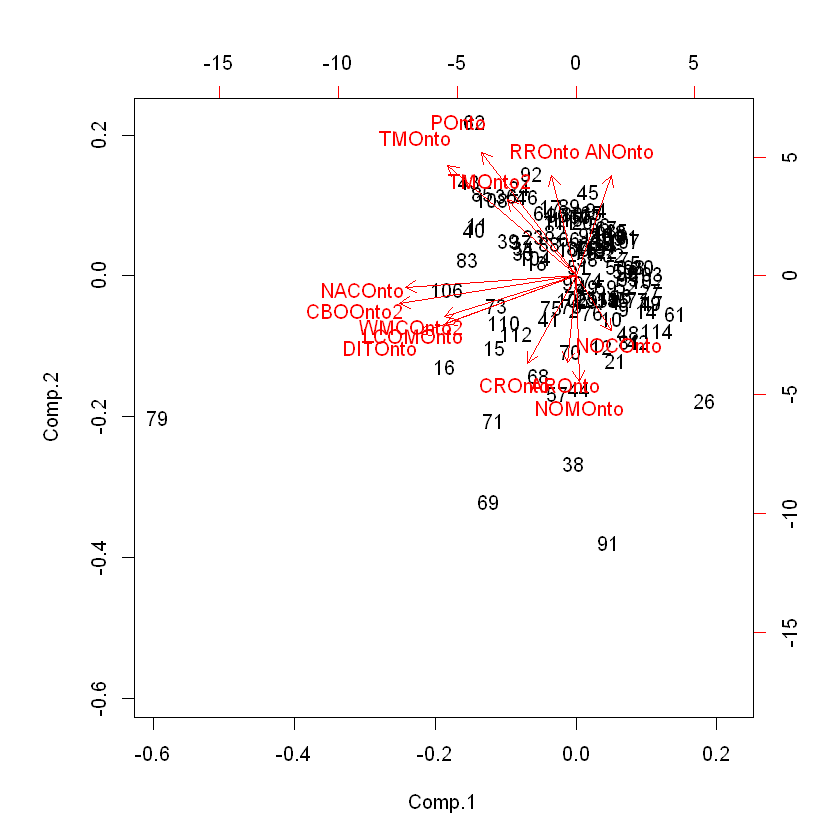

In [155]:
# Representación gráfica del PCA
print(parte.pca)
print(cumsum(parte.pca))
biplot(data.pca)

# References <a class="anchor" id="references"></a>

<a id="1">[1]</a>
https://www.r-data-scientist.com/es/blog/statistical-tests/bartlett-test/

<a id="2">[2]</a>
https://www.r-data-scientist.com/es/blog/statistical-tests/kaiser-meyer-olkin-test/
